In [1]:
import pandas as pd
import time
import gc
import sklearn
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from scipy.sparse import hstack
from scipy.sparse import coo_matrix
import xgboost as xgb
from scipy.stats import uniform
from sklearn.model_selection import ParameterSampler
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from scipy.stats import uniform
import ast
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from xgboost.callback import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

random_state = 42
np.random.seed(random_state)

In [41]:
ctr_15 = pd.read_csv('/Users/ionikullock/Desktop/UTDT-Tecnología Digital/TD VI/Trabajo práctico 2/Datos/ctr_15.csv')
ctr_16 = pd.read_csv('/Users/ionikullock/Desktop/UTDT-Tecnología Digital/TD VI/Trabajo práctico 2/Datos/ctr_16.csv')
#ctr_17 = pd.read_csv('/Users/ionikullock/Desktop/UTDT-Tecnología Digital/TD VI/Trabajo práctico 2/Datos/ctr_17.csv') 
#ctr_18 = pd.read_csv('/Users/ionikullock/Desktop/UTDT-Tecnología Digital/TD VI/Trabajo práctico 2/Datos/ctr_18.csv')
#ctr_19 = pd.read_csv('/Users/ionikullock/Desktop/UTDT-Tecnología Digital/TD VI/Trabajo práctico 2/Datos/ctr_19.csv') 
#ctr_20 = pd.read_csv('/Users/ionikullock/Desktop/UTDT-Tecnología Digital/TD VI/Trabajo práctico 2/Datos/ctr_20.csv')    
data = pd.concat(([ctr_15,ctr_16]))
#data = ctr_15
ctr_test = pd.read_csv('/Users/ionikullock/Desktop/UTDT-Tecnología Digital/TD VI/Trabajo práctico 2/Datos/ctr_test.csv')
ctr_test = ctr_test.drop(columns="id", errors='ignore')

print("Tamaño del conjunto ", data.shape)
print("Tamaño del conjunto ", ctr_test.shape)


KeyboardInterrupt: 

In [28]:
# Lista de columnas a eliminar
columns_to_remove = [
    'action_categorical_0', 'action_categorical_2', 'action_categorical_4', 
    'auction_categorical_0', 'auction_categorical_11', 'auction_categorical_3', 'auction_time', 
    'auction_categorical_10', 'action_categorical_7', 'action_categorical_6',
    'auction_boolean_1', 'auction_boolean_2', 'creative_categorical_10',
    'auction_categorical_4', 'gender', 'creative_categorical_1', 
    'auction_categorical_6', 'creative_categorical_3',
    'auction_categorical_2', 'action_categorical_5',
    'auction_categorical_1', 'auction_categorical_5', 'device_id_type',
    'auction_categorical_8', 'action_categorical_0', 'auction_categorical_0',
    'creative_categorical_9', 'creative_categorical_11', 'creative_categorical_5',
    'creative_categorical_7', 'creative_categorical_12', 'creative_categorical_8',
    'creative_categorical_4', 'creative_categorical_6', 'action_categorical_1',
    'creative_categorical_2', 'action_categorical_3', 'action_categorical_2',
    'auction_categorical_11', 'action_categorical_4',
    'creative_categorical_0', 'device_id', 'auction_boolean_0',
      #'action_list_2','action_list_1','action_list_0', 'auction_list_0'
]

ctr_test['creative_height_square'] = ctr_test['creative_height'] * ctr_test['creative_height']
ctr_test['creative_width_square'] = ctr_test['creative_width'] * ctr_test['creative_width']
ctr_test['creative_area'] = ctr_test['creative_height'] * ctr_test['creative_width']

data['creative_height_square'] = data['creative_height'] * data['creative_height']
data['creative_width_square'] = data['creative_width'] * data['creative_width']
data['creative_area'] = data['creative_height'] * data['creative_width']

data = data.drop(columns=columns_to_remove, errors='ignore')
ctr_test = ctr_test.drop(columns=columns_to_remove, errors='ignore')

print(f"Columnas eliminadas: {columns_to_remove}")
print(f"Tamaño del data después de la eliminación: {data.shape}")
print(f"Tamaño del test después de la eliminación: {ctr_test.shape}")
data.info()



Columnas eliminadas: ['device_id', 'action_categorical_0', 'action_categorical_2', 'action_categorical_4', 'auction_categorical_0', 'auction_categorical_11', 'auction_categorical_3', 'Auction_time', 'auction_categorical_10', 'action_categorical_7', 'action_categorical_6', 'auction_boolean_1', 'auction_boolean_2', 'creative_categorical_10', 'auction_categorical_4', 'gender', 'creative_categorical_1', 'auction_categorical_6', 'creative_categorical_3', 'auction_categorical_2', 'action_categorical_5', 'auction_categorical_1', 'auction_categorical_5', 'action_categorical_0', 'auction_categorical_0', 'creative_categorical_9', 'creative_categorical_11', 'creative_categorical_5', 'creative_categorical_7', 'creative_categorical_12', 'creative_categorical_8', 'creative_categorical_4', 'creative_categorical_6', 'action_categorical_1', 'creative_categorical_2', 'action_categorical_3', 'action_categorical_2', 'auction_categorical_11', 'action_categorical_4', 'creative_categorical_0', 'auction_boole

In [29]:
def impute_count(value):
    if isinstance(value, list):  # Verificar si el valor es una lista
        return len(value)  # Devolver el número de elementos de la lista
    else:
        return 0  # Valor predeterminado si no es una lista

# Aplicar la función a las columnas correspondientes
data['action_list_2'] = data['action_list_2'].apply(impute_count)
ctr_test['action_list_2'] = ctr_test['action_list_2'].apply(impute_count)

data['action_list_1'] = data['action_list_1'].apply(impute_count)
ctr_test['action_list_1'] = ctr_test['action_list_1'].apply(impute_count)

data['action_list_0'] = data['action_list_0'].apply(impute_count)
ctr_test['action_list_0'] = ctr_test['action_list_0'].apply(impute_count)

data['auction_list_0'] = data['auction_list_0'].apply(impute_count)
ctr_test['auction_list_0'] = ctr_test['auction_list_0'].apply(impute_count)

# Mostrar información de los DataFrames
data.info()
ctr_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2331937 entries, 0 to 1092412
Data columns (total 19 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Label                   int64  
 1   action_list_0           int64  
 2   action_list_1           int64  
 3   action_list_2           int64  
 4   auction_bidfloor        float64
 5   auction_categorical_12  object 
 6   auction_categorical_7   object 
 7   auction_categorical_8   object 
 8   auction_categorical_9   object 
 9   auction_list_0          int64  
 10  auction_time            float64
 11  creative_height         float64
 12  creative_width          float64
 13  device_id_type          object 
 14  has_video               bool   
 15  timezone_offset         float64
 16  creative_height_square  float64
 17  creative_width_square   float64
 18  creative_area           float64
dtypes: bool(1), float64(8), int64(5), object(5)
memory usage: 340.3+ MB
<class 'pandas.core.frame.DataFrame'>
Rang

In [6]:
def impute_average(value):
    if isinstance(value, list):  # Verificar si el valor es una lista
        # Convertir todos los elementos de la lista a enteros, ignorando cualquier dato no convertible
        int_list = [int(x) for x in value if isinstance(x, (int, str)) and str(x).isdigit()]
        if len(int_list) == 0:
            return 0  # o cualquier valor predeterminado para listas vacías
        return int(sum(int_list) / len(int_list))
    else:
        return 0  # Valor predeterminado si no es una lista

# Aplicar la función a la columna 'action_list_2'
data['action_list_2'] = data['action_list_2'].apply(impute_average)
ctr_test['action_list_2'] = ctr_test['action_list_2'].apply(impute_average)

data['action_list_1'] = data['action_list_1'].apply(impute_average)
ctr_test['action_list_1'] = ctr_test['action_list_1'].apply(impute_average)

data['action_list_0'] = data['action_list_0'].apply(impute_average)
ctr_test['action_list_0'] = ctr_test['action_list_0'].apply(impute_average)

data['auction_list_0'] = data['auction_list_0'].apply(impute_average)
ctr_test['auction_list_0'] = ctr_test['auction_list_0'].apply(impute_average)

data.info()
ctr_test.info()


KeyError: 'action_list_2'

In [30]:
y = data[['Label']].copy() 
X = data.drop('Label', axis = 1)

X_train, X_val, Y_train, Y_val = train_test_split(X, y,
                                                  train_size = 0.8,
                                                  random_state = 32,
                                                  stratify = y)
print(f'Cantidad de datos de train: {len(X_train)}')
print(f'Cantidad de datos de validación: {len(X_val)}')
print(f"Tamaño del data después de la eliminación: {data.shape}")
print(f"Tamaño del test después de la eliminación: {ctr_test.shape}")


Cantidad de datos de train: 1865549
Cantidad de datos de validación: 466388
Tamaño del data después de la eliminación: (2331937, 19)
Tamaño del test después de la eliminación: (1139639, 18)


In [5]:
def fill_nans(df):
    numeric_columns = df.select_dtypes(include=['number']).columns
    for col in numeric_columns:
        mode_value = df[col].mode()[0] 
        df[col].fillna(mode_value, inplace=True)

    categorical_columns = df.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        mode_value = df[col].mode()[0]
        df[col].fillna(mode_value, inplace=True)
    
    return df

X_train = fill_nans(X_train)
X_val = fill_nans(X_val)
ctr_test = fill_nans(ctr_test)

print(f"Tamaño del data después de rellenar NaNs: {data.shape}")
print(f"Tamaño del test después de rellenar NaNs: {X_val.shape}")
print(f"Tamaño del test después de rellenar NaNs: {ctr_test.shape}")

/var/folders/m6/yrlm4ckj0r71yq2s7_1v54kh0000gn/T/ipykernel_54855/3841489051.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)
/var/folders/m6/yrlm4ckj0r71yq2s7_1v54kh0000gn/T/ipykernel_54855/3841489051.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

Tamaño del data después de rellenar NaNs: (1239524, 10)
Tamaño del test después de rellenar NaNs: (247905, 9)
Tamaño del test después de rellenar NaNs: (1139639, 9)


/var/folders/m6/yrlm4ckj0r71yq2s7_1v54kh0000gn/T/ipykernel_54855/3841489051.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)


In [31]:
def group_rare_categories(column, threshold):
    freq = column.value_counts(normalize=True)
    rare_categories = freq[freq < threshold].index
    return column.apply(lambda x: 'Other' if x in rare_categories else x)

threshold = 0.005

categorical_columns = X_train.select_dtypes(include=['object']).columns.tolist()

if 'action_list_2' in categorical_columns:
    categorical_columns.remove('action_list_2')

for col in categorical_columns:
    X_train[col] = group_rare_categories(X_train[col], threshold)

pd_ohe = pd.get_dummies(X_train,
                        columns=categorical_columns + ['has_video'],
                        sparse=False,
                        dummy_na=False,
                        dtype=int)

print("Shape de data después de OneHotEncoding:", pd_ohe.shape)
pd_ohe.info()

Shape de data después de OneHotEncoding: (1865549, 136)
<class 'pandas.core.frame.DataFrame'>
Index: 1865549 entries, 1164505 to 178735
Columns: 136 entries, action_list_0 to has_video_True
dtypes: float64(8), int64(128)
memory usage: 1.9 GB


In [32]:
missing_columns_validation = pd_ohe.columns.difference(X_val.columns)
missing_columns_test = pd_ohe.columns.difference(ctr_test.columns)

for col in missing_columns_validation:
    X_val[col] = 0
print("done validation")

for col in missing_columns_test:
    ctr_test[col] = 0
print("done test")

label_column = 'label'
common_columns_val = X_val.columns.intersection(pd_ohe.columns)
common_columns_test = ctr_test.columns.intersection(pd_ohe.columns.drop(label_column, errors='ignore'))

X_val = X_val[common_columns_val]
ctr_test = ctr_test[common_columns_test]

if label_column in ctr_test.columns:
    ctr_test = ctr_test.drop(columns=[label_column])

print(pd_ohe.shape)
print(X_val.shape)
print(ctr_test.shape)

print(pd_ohe.dtypes)
print(ctr_test.dtypes)


/var/folders/m6/yrlm4ckj0r71yq2s7_1v54kh0000gn/T/ipykernel_85166/583896589.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_val[col] = 0
/var/folders/m6/yrlm4ckj0r71yq2s7_1v54kh0000gn/T/ipykernel_85166/583896589.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_val[col] = 0
/var/folders/m6/yrlm4ckj0r71yq2s7_1v54kh0000gn/T/ipykernel_85166/583896589.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all c

done validation


/var/folders/m6/yrlm4ckj0r71yq2s7_1v54kh0000gn/T/ipykernel_85166/583896589.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ctr_test[col] = 0
/var/folders/m6/yrlm4ckj0r71yq2s7_1v54kh0000gn/T/ipykernel_85166/583896589.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ctr_test[col] = 0
/var/folders/m6/yrlm4ckj0r71yq2s7_1v54kh0000gn/T/ipykernel_85166/583896589.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining

done test
(1865549, 136)
(466388, 136)
(1139639, 136)
action_list_0                int64
action_list_1                int64
action_list_2                int64
auction_bidfloor           float64
auction_list_0               int64
                            ...   
device_id_type_6324b367      int64
device_id_type_Other         int64
device_id_type_c1d12c8e      int64
has_video_False              int64
has_video_True               int64
Length: 136, dtype: object
action_list_0                int64
action_list_1                int64
action_list_2                int64
auction_bidfloor           float64
auction_list_0               int64
                            ...   
device_id_type_6324b367      int64
device_id_type_Other         int64
device_id_type_c1d12c8e      int64
has_video_False              int64
has_video_True               int64
Length: 136, dtype: object


In [9]:
params = {'max_depth': list(range(1, 40)),
          'learning_rate': uniform(scale = 0.2),
          'gamma': uniform(scale = 2),
          'reg_lambda': uniform(scale = 5),        # Parámetro de regularización.
          'subsample': uniform(0.5, 0.5),          # Entre 0.5 y 1.
          'min_child_weight': uniform(scale = 5),
          'colsample_bytree': uniform(0.75, 0.25), # Entre 0.75 y 1.
          'n_estimators': list(range(1, 1000))
         }

start = time.time()
best_score = 0
best_estimator = None
iterations = 50
current_iteration = 1  # Inicia el contador de iteraciones

for g in ParameterSampler(params, n_iter=iterations, random_state=32):
    print(f'Iteración {current_iteration} de {iterations}')  # Imprime la iteración actual

    clf_xgb = xgb.XGBClassifier(objective='binary:logistic', seed=32, eval_metric='auc', tree_method='hist', device='cuda', **g)
    clf_xgb.fit(pd_ohe, Y_train, eval_set=[(X_val, Y_val)], verbose=False)

    y_pred = clf_xgb.predict_proba(X_val)[:, 1]  # Obtenemos la probabilidad de una de las clases (cualquiera).
    auc_roc = sklearn.metrics.roc_auc_score(Y_val, y_pred)

    # Guardamos si es mejor.
    if auc_roc > best_score:
        print(f'Mejor valor de ROC-AUC encontrado: {auc_roc}')
        best_score = auc_roc
        best_grid = g
        best_estimator = clf_xgb

    current_iteration += 1  # Aumenta el contador de iteraciones

end = time.time()
print('ROC-AUC: %0.5f' % best_score)
print('Grilla:', best_grid)
print(f'Tiempo transcurrido: {str(end - start)} segundos')
print(f'Tiempo de entrenamiento por iteración: {str(round((end - start) / iterations, 2))} segundos')

Iteración 1 de 50


/opt/anaconda3/envs/TD6/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:23:19] WARNING: /Users/runner/work/xgboost/xgboost/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


Mejor valor de ROC-AUC encontrado: 0.7926394200611644
Iteración 2 de 50


/opt/anaconda3/envs/TD6/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:23:49] WARNING: /Users/runner/work/xgboost/xgboost/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


Mejor valor de ROC-AUC encontrado: 0.8044740385186844
Iteración 3 de 50


/opt/anaconda3/envs/TD6/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:26:19] WARNING: /Users/runner/work/xgboost/xgboost/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


Iteración 4 de 50


/opt/anaconda3/envs/TD6/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:26:44] WARNING: /Users/runner/work/xgboost/xgboost/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


Mejor valor de ROC-AUC encontrado: 0.8052383237230496
Iteración 5 de 50


/opt/anaconda3/envs/TD6/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:30:00] WARNING: /Users/runner/work/xgboost/xgboost/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


Iteración 6 de 50


/opt/anaconda3/envs/TD6/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:32:54] WARNING: /Users/runner/work/xgboost/xgboost/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


Iteración 7 de 50


/opt/anaconda3/envs/TD6/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:34:57] WARNING: /Users/runner/work/xgboost/xgboost/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


Iteración 8 de 50


/opt/anaconda3/envs/TD6/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:36:00] WARNING: /Users/runner/work/xgboost/xgboost/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


Iteración 9 de 50


/opt/anaconda3/envs/TD6/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:37:56] WARNING: /Users/runner/work/xgboost/xgboost/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


Iteración 10 de 50


/opt/anaconda3/envs/TD6/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:39:31] WARNING: /Users/runner/work/xgboost/xgboost/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


Iteración 11 de 50


/opt/anaconda3/envs/TD6/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:41:29] WARNING: /Users/runner/work/xgboost/xgboost/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


Iteración 12 de 50


/opt/anaconda3/envs/TD6/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:44:05] WARNING: /Users/runner/work/xgboost/xgboost/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


Iteración 13 de 50


/opt/anaconda3/envs/TD6/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:44:47] WARNING: /Users/runner/work/xgboost/xgboost/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


Iteración 14 de 50


/opt/anaconda3/envs/TD6/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:48:55] WARNING: /Users/runner/work/xgboost/xgboost/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


Iteración 15 de 50


/opt/anaconda3/envs/TD6/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:49:26] WARNING: /Users/runner/work/xgboost/xgboost/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


Iteración 16 de 50


/opt/anaconda3/envs/TD6/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:51:02] WARNING: /Users/runner/work/xgboost/xgboost/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


Iteración 17 de 50


/opt/anaconda3/envs/TD6/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:54:03] WARNING: /Users/runner/work/xgboost/xgboost/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


Iteración 18 de 50


/opt/anaconda3/envs/TD6/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:55:34] WARNING: /Users/runner/work/xgboost/xgboost/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


Iteración 19 de 50


/opt/anaconda3/envs/TD6/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:59:13] WARNING: /Users/runner/work/xgboost/xgboost/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


Iteración 20 de 50


/opt/anaconda3/envs/TD6/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:00:38] WARNING: /Users/runner/work/xgboost/xgboost/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


Iteración 21 de 50


/opt/anaconda3/envs/TD6/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:02:32] WARNING: /Users/runner/work/xgboost/xgboost/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


Iteración 22 de 50


/opt/anaconda3/envs/TD6/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:03:14] WARNING: /Users/runner/work/xgboost/xgboost/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


Iteración 23 de 50


/opt/anaconda3/envs/TD6/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:06:49] WARNING: /Users/runner/work/xgboost/xgboost/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


Iteración 24 de 50


/opt/anaconda3/envs/TD6/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:10:15] WARNING: /Users/runner/work/xgboost/xgboost/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


Iteración 25 de 50


/opt/anaconda3/envs/TD6/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:16:33] WARNING: /Users/runner/work/xgboost/xgboost/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


Iteración 26 de 50


/opt/anaconda3/envs/TD6/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:21:50] WARNING: /Users/runner/work/xgboost/xgboost/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


Iteración 27 de 50


/opt/anaconda3/envs/TD6/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:24:55] WARNING: /Users/runner/work/xgboost/xgboost/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


Iteración 28 de 50


/opt/anaconda3/envs/TD6/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:26:51] WARNING: /Users/runner/work/xgboost/xgboost/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


Iteración 29 de 50


/opt/anaconda3/envs/TD6/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:27:17] WARNING: /Users/runner/work/xgboost/xgboost/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


Iteración 30 de 50


/opt/anaconda3/envs/TD6/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:29:31] WARNING: /Users/runner/work/xgboost/xgboost/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


Iteración 31 de 50


/opt/anaconda3/envs/TD6/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:33:45] WARNING: /Users/runner/work/xgboost/xgboost/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


Iteración 32 de 50


/opt/anaconda3/envs/TD6/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:36:49] WARNING: /Users/runner/work/xgboost/xgboost/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


Iteración 33 de 50


/opt/anaconda3/envs/TD6/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:38:45] WARNING: /Users/runner/work/xgboost/xgboost/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


Iteración 34 de 50


/opt/anaconda3/envs/TD6/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:41:56] WARNING: /Users/runner/work/xgboost/xgboost/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


Iteración 35 de 50


/opt/anaconda3/envs/TD6/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:43:00] WARNING: /Users/runner/work/xgboost/xgboost/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


Iteración 36 de 50


/opt/anaconda3/envs/TD6/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:13] WARNING: /Users/runner/work/xgboost/xgboost/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


Iteración 37 de 50


/opt/anaconda3/envs/TD6/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:44:58] WARNING: /Users/runner/work/xgboost/xgboost/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


Iteración 38 de 50


/opt/anaconda3/envs/TD6/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:46:04] WARNING: /Users/runner/work/xgboost/xgboost/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


Iteración 39 de 50


/opt/anaconda3/envs/TD6/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:47:04] WARNING: /Users/runner/work/xgboost/xgboost/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


Iteración 40 de 50


/opt/anaconda3/envs/TD6/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:50:12] WARNING: /Users/runner/work/xgboost/xgboost/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


Iteración 41 de 50


/opt/anaconda3/envs/TD6/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:51:22] WARNING: /Users/runner/work/xgboost/xgboost/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


Iteración 42 de 50


/opt/anaconda3/envs/TD6/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:54:30] WARNING: /Users/runner/work/xgboost/xgboost/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


Iteración 43 de 50


/opt/anaconda3/envs/TD6/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:56:50] WARNING: /Users/runner/work/xgboost/xgboost/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


Iteración 44 de 50


/opt/anaconda3/envs/TD6/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:01:06] WARNING: /Users/runner/work/xgboost/xgboost/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


Iteración 45 de 50


/opt/anaconda3/envs/TD6/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:03:09] WARNING: /Users/runner/work/xgboost/xgboost/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


Iteración 46 de 50


/opt/anaconda3/envs/TD6/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:06:13] WARNING: /Users/runner/work/xgboost/xgboost/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


Iteración 47 de 50


/opt/anaconda3/envs/TD6/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:06:34] WARNING: /Users/runner/work/xgboost/xgboost/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


Iteración 48 de 50


/opt/anaconda3/envs/TD6/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:09:05] WARNING: /Users/runner/work/xgboost/xgboost/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


Iteración 49 de 50


/opt/anaconda3/envs/TD6/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:12:06] WARNING: /Users/runner/work/xgboost/xgboost/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


Iteración 50 de 50


/opt/anaconda3/envs/TD6/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:15:05] WARNING: /Users/runner/work/xgboost/xgboost/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


ROC-AUC: 0.80524
Grilla: {'colsample_bytree': 0.7732274867094971, 'gamma': 1.8050427802244318, 'learning_rate': 0.09219208117648266, 'max_depth': 7, 'min_child_weight': 0.006491690852697407, 'n_estimators': 965, 'reg_lambda': 0.812118717763774, 'subsample': 0.8546852920995762}
Tiempo transcurrido: 6919.468029975891 segundos
Tiempo de entrenamiento por iteración: 138.39 segundos


/opt/anaconda3/envs/TD6/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:20:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-auc:0.75607
[1]	validation_0-auc:0.77340
[2]	validation_0-auc:0.77992
[3]	validation_0-auc:0.77205
[4]	validation_0-auc:0.77262
[5]	validation_0-auc:0.77484
[6]	validation_0-auc:0.77149
[7]	validation_0-auc:0.77489
[8]	validation_0-auc:0.77640
[9]	validation_0-auc:0.77624
[10]	validation_0-auc:0.77766
[11]	validation_0-auc:0.77842
[12]	validation_0-auc:0.77906
[13]	validation_0-auc:0.78164
[14]	validation_0-auc:0.78334
[15]	validation_0-auc:0.78446
[16]	validation_0-auc:0.78483
[17]	validation_0-auc:0.78592
[18]	validation_0-auc:0.78208
[19]	validation_0-auc:0.78238
[20]	validation_0-auc:0.78220
[21]	validation_0-auc:0.78107
[22]	validation_0-auc:0.78131
[23]	validation_0-auc:0.78065
[24]	validation_0-auc:0.78102
[25]	validation_0-auc:0.78051
[26]	validation_0-auc:0.78498
[27]	validation_0-auc:0.78499
[28]	validation_0-auc:0.79140
[29]	validation_0-auc:0.79147
[30]	validation_0-auc:0.79772
[31]	validation_0-auc:0.79791
[32]	validation_0-auc:0.79791
[33]	validation_0-au

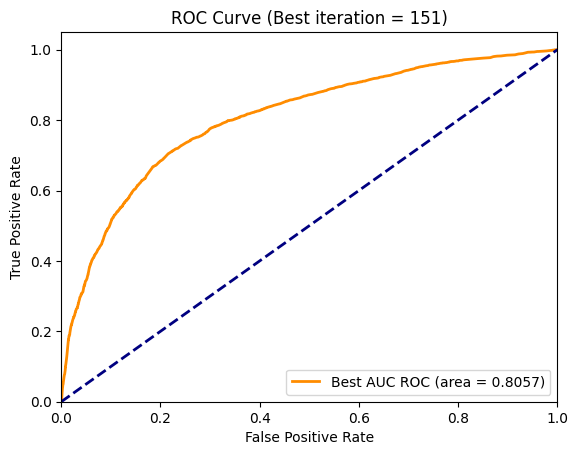

La mejor iteración es: 151 con un AUC de: 0.8057


In [33]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic',
                            seed=42,
                            eval_metric='auc',
                            use_label_encoder=False,
                            colsample_bytree=0.7732274867094971, 
                            gamma= 1.8050427802244318, 
                            learning_rate= 0.09219208117648266, 
                            max_depth= 7, 
                            min_child_weight= 0.006491690852697407, 
                            n_estimators= 200, 
                            reg_lambda= 0.812118717763774, 
                            subsample= 0.8546852920995762) 

clf_xgb.fit(pd_ohe, Y_train, verbose=True, eval_set=[(X_val, Y_val)])

best_auc = 0
best_iteration = 0
y_pred_best = None

In [ ]:
importances = clfxgb.feature_importances
feature_importance_df = pd.DataFrame({'Feature': X_train_a.columns, 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)
threshold = 0.001  # Por ejemplo, eliminar características con importancia menor al 1%
features_to_keep = feature_importance_df[feature_importance_df['Importance'] >= threshold]['Feature']
X_train_f = X_train_a[features_to_keep]
X_val_f = X_val_a[features_to_keep]
X_test_f = X_test_a[features_to_keep]

In [12]:
ctr_test['id'] = range(1, len(ctr_test) + 1)
y_pred_test = clf_xgb.predict_proba(ctr_test.drop(columns=["id"]))[:, clf_xgb.classes_ == 1].squeeze()
submission_df = pd.DataFrame({"id": ctr_test["id"], "Label": y_pred_test})
submission_df["id"] = submission_df["id"].astype(int)
submission_df.to_csv("test_xgboost.csv", sep=",", index=False)

/var/folders/m6/yrlm4ckj0r71yq2s7_1v54kh0000gn/T/ipykernel_85166/2455609469.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ctr_test['id'] = range(1, len(ctr_test) + 1)
